# Example 2 : Solow growth model

Capital stock per capita is evolves according to the rule:
$$k_{t+1} = \frac{s z k_t^{\alpha} + (1 - \delta) k_t}{1 + n} \tag{1}$$
where:
1. s : exogenous given saving rate
2. z : productivity parameter
3. a : capital share of income
4. n : population growth rate
5. δ : depreciation rate

steady state model is when: $$k_{t+1} = k_t = k$$

In [1]:
class Solow:
    
    """""
    implement the Solow growth model with the update rule:
    
    k_{t+1} = [(s z k^α_t) + (1 - δ)k_t / (1 + n)]
    
    """""
    def __init__ (self, n = 0.05,  #population growth rate
                        s = 0.25,  #saving rate
                        δ = 0.1,   #depreciation rate
                        α = 0.3,   #share of labor
                        z = 2.0,   #productivity
                        k = 1.0):  #current capital stock
        self.n, self.s, self.δ, self.α, self.z = n, s, δ, α, z
        self.k = k
    
    def h (self):
        "evaluate the h function --> function of k_{t+1}"
        #unpack parameters (get rid of self to simplify notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        #apply the update rule
        return (s * z * self.k**α + (1 - δ) * self.k) / (1 + n)
    
    def update(self):
        "update current state (i.e, the capital stock)"
        self.k = self.h()
    
    def steady_state (self):
        "compute the steady state value of capital --> where k{t+1}=k{t}=k"
        #unpack parameters
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        #compute and return the stady state
        return ((s * z) / (n + δ)) ** (1 / (1 - α))
    
    def generate_sequence (self, t):
        "generate and return a time series of length t"
        path = []
        for i in range (t):
            path.append (self.k)
            self.update()
        return path

import matplotlib.pyplot as plt
%matplotlib inline

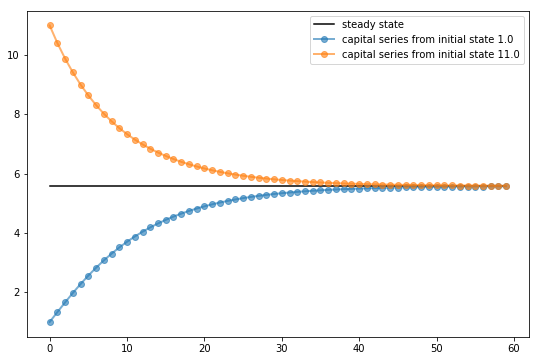

In [2]:
# comparing countries with diff initial capital 

s1 = Solow ()
s2 = Solow (k = 11.0)
T = 60
fig, ax = plt.subplots(figsize=(9, 6))

# Plot the common steady state value of capital
ax.plot([s1.steady_state()]*T, 'k-', label='steady state')

# Plot time series for each economy
for s in s1, s2:
    lb = f'capital series from initial state {s.k}'
    ax.plot(s.generate_sequence(T), 'o-', lw=2, alpha=0.6, label=lb)

ax.legend()
plt.show()

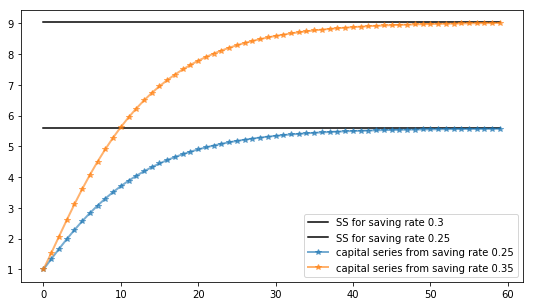

In [3]:
# comparing countries with diff saving rate 

s3 = Solow (s = 0.35)
s4 = Solow ()

T = 60
fig, ax = plt.subplots(figsize=(9, 5))

# Plot the common steady state value of capital
ax.plot([s3.steady_state()]*T, 'k-', label='SS for saving rate 0.3')
ax.plot([s4.steady_state()]*T, 'k-', label='SS for saving rate 0.25')

# Plot time series for each economy
for s in s4, s3:
    lb = f'capital series from saving rate {s.s}'
    ax.plot(s.generate_sequence(T), '*-', lw=2, alpha=0.6, label=lb)

ax.legend()
plt.show()